In [1]:
from IPython.display import Image

# Quantum jump Monte Carlo Simulation(QJMC)

In QJMC, the probability quantum jump operators $c_{m}$ act at each time step is 

Image(url="https://github.com/JSKao/Notes_and_References/blob/main/images/formula2.png", width=350, height=200)

This first order propagation is valid when $\delta t$ is chosen such that $\delta p << 1$ 

Propagated state is sampled by 

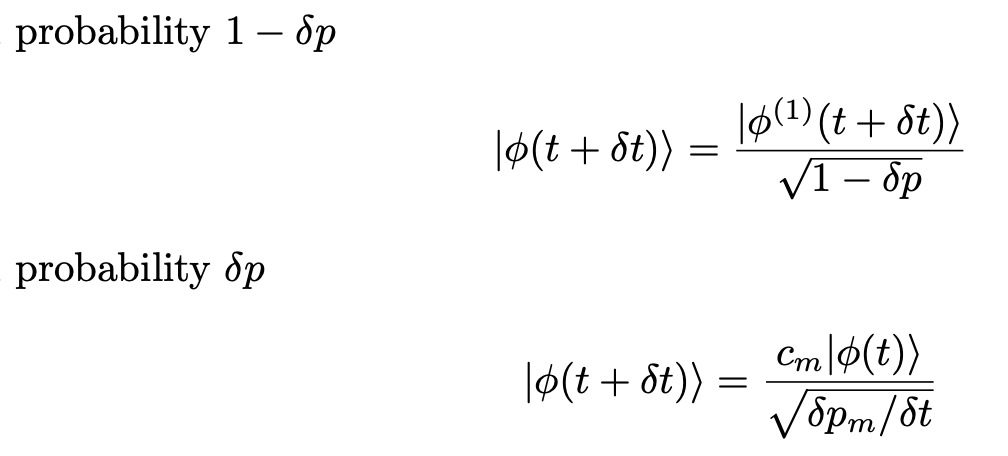

"Trajectory average" of operator A : 
$\bar{<A>}_{t} = (1-\delta p)<\phi_{evo}(t)|A|\phi_{evo}(t)> + \delta p <\phi_{jump}(t)|A|\phi_{jump}(t)>$

where $\phi_{evo}(t)$ and $\phi_{jump}(t)$ correspond to the sampled propagated states following the above sampling rule.

# Two level system

For the case of two level sysyem only one jump, that is, $c^{\dagger}_m = \sigma^{+}$, $c_m = \sigma^{-}$, and probability $p_{m}=p$.

Thus, $\delta p = \delta t <\phi(t)|\gamma\sigma^{+}\sigma^{-}|\phi(t)> $

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.linalg import expm

In [100]:
# Define Pauli matrices and creation/annihilation operators
identity = np.eye(2, dtype = complex)
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_plus =  np.array([[0, 1], [0, 0]], dtype=complex)
sigma_minus = np.array([[0, 0], [1, 0]], dtype=complex)

# Define ground state, excited state
rho_gg = np.array([[1, 0], [0, 0]], dtype=complex)
rho_ee = np.array([[0, 0], [0, 1]], dtype=complex)

# Initialize state = ground state
rho = rho_gg

In [88]:
# Define effective Hamiltonian for the two-level system
omega = 15
gamma = 5
H = omega * sigma_x - 1j/2 * gamma * sigma_plus @ sigma_minus
H_dagger = np.transpose(H.conj())

Final state rho(t) =
[[0.06452406+0.j         0.        -0.05518929j]
 [0.        +0.05518929j 0.04720499+0.j        ]]


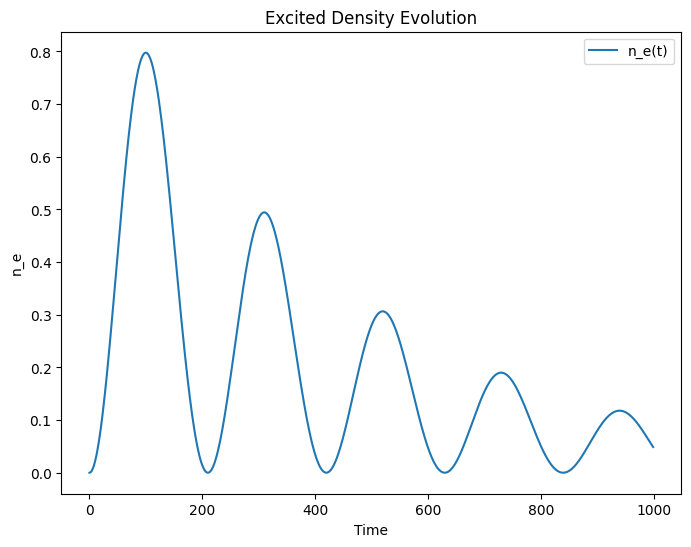

In [79]:
# QJMC simulation
# Define parameters
t = 0
dt = 0.001
total_time = 1.0
rho_list = []   # density matrices
n_e_list = []   # excitation density

# Simulation
while t < total_time:
    # record the current density matrix, and excitation density
    rho_list.append(rho.copy())
    n_e_list.append(np.trace(rho_ee @ rho)) 
    
    # calculate delta p
    dp = dt * gamma * np.trace(rho @ sigma_plus @ sigma_minus)
    
    # generate random number between 0 and 1
    r = np.random.rand()

    # propagate the state by the jump mechanism
    if r < dp:
        rho = dt/dp * gamma * sigma_minus @ rho @ sigma_plus
    else:
        rho = (identity - 1j * dt * H) @ rho @ (identity + 1j * dt * H_dagger)
        
    # update time
    t += dt

n_e_array = np.array(n_e_list)

print("Final state rho(t) =")
print(rho)

plt.figure(figsize=(8,6))
plt.plot(n_e_array, label = 'n_e(t)')

plt.title('Excited Density Evolution')
plt.xlabel('Time')
plt.ylabel('n_e')
plt.legend()
plt.show()


# Two interacting atoms 

For the case of two two-level atoms, we represent operators in the basis 
{$|1> =|g>\otimes|g>,|2> =|g>\otimes|e>,|3> =|e>\otimes|g>,|4> =|e>\otimes|e>$}

It's also important to clarify that all operators are two-body, eg. $\sigma_{1} = \sigma \otimes I$, and $\sigma_{2} = I \otimes \sigma $ 


$\delta p = \delta t <\phi(t)|\gamma\sum_{k,m}\sigma_{k}^{+}\sigma_{m}^{-}|\phi(t)>$ or, in terms of density matrix, $\delta p =\delta t \cdot trace[\rho\cdot(\gamma\sum_{k,m}\sigma_{k}^{+}\sigma_{m}^{-})]$

Notice that since $\delta p = \sum_{k,m} \delta p_{km}$, everytime jump occurs we need to pick one among the four $\delta p_{km}$, according to the probability $\pi_{m}=\frac{\delta p_{km}}{\delta p}$

In [107]:
# Define Pauli operators for two-atom system
identity_atom = np.eye(4, dtype = complex)
sigma_x_1 = np.kron(sigma_x, identity)
sigma_x_2 = np.kron(identity, sigma_x)
sigma_plus_1 = np.kron(sigma_plus, identity)
sigma_plus_2 = np.kron(identity, sigma_plus)
sigma_minus_1 = np.kron(sigma_minus, identity)
sigma_minus_2 = np.kron(identity, sigma_minus)

# Define ground state, excited states
rho_gg_atom = np.kron(rho_gg,rho_gg)
rho_ee_atom_1 = np.kron(rho_ee, 1/2*identity)
rho_ee_atom_2 = np.kron(1/2*identity, rho_ee)

# Initialize state = both atoms in ground state
rho_atom = rho_gg_atom


In [108]:
# Define effective Hamiltonian for the two-atom system
omega_atom = 15
gamma_atom = 5
# principal part
H_o = omega_atom * (sigma_x_1 + sigma_x_2)
# dissipation part
H_dissipat = gamma_atom * (sigma_plus_1 @ sigma_minus_1 + sigma_plus_1 @ sigma_minus_2 + sigma_plus_2 @ sigma_minus_1 + sigma_plus_2 @ sigma_minus_2)
# total Hamiltonian
H_atom = H_o - 1j/2 * H_dissipat
H_atom_dagger = np.transpose(H_atom.conj())

(0.001284426049313184+0j) (0.00022914148483876593+0j) (0.00022914148483876512+0j) (0.0012844260493131815+0j)
(0.4243041755096999+0j) (0.07569582449030061+0j) (0.07569582449030035+0j) (0.4243041755096991+0j)
(0.0038040337584082777+0j) (2.715457742497552e-06+0j) (2.7154577425075234e-06+0j) (0.003804033758408298+0j)
(0.4996433364022258+0j) (0.00035666359777218235+0j) (0.00035666359777349207+0j) (0.49964333640222847+0j)
(0.014961507549494107+0j) (0.013681942409618392+0j) (0.013681942409618411+0j) (0.014961507549494149+0j)
(0.2611680431451363+0j) (0.23883195685486316+0j) (0.2388319568548635+0j) (0.26116804314513703+0j)
(0.13189182238220643+0j) (0.02098683679229038+0j) (0.020986836792290315+0j) (0.1318918223822063+0j)
(0.4313611301092856+0j) (0.06863886989071465+0j) (0.06863886989071444+0j) (0.4313611301092852+0j)
(1.209102320619753+0j) (0.8477606372912517+0j) (0.8477606372912515+0j) (1.2091023206197522+0j)
(0.29391902750967525+0j) (0.2060809724903248+0j) (0.20608097249032478+0j) (0.29391902

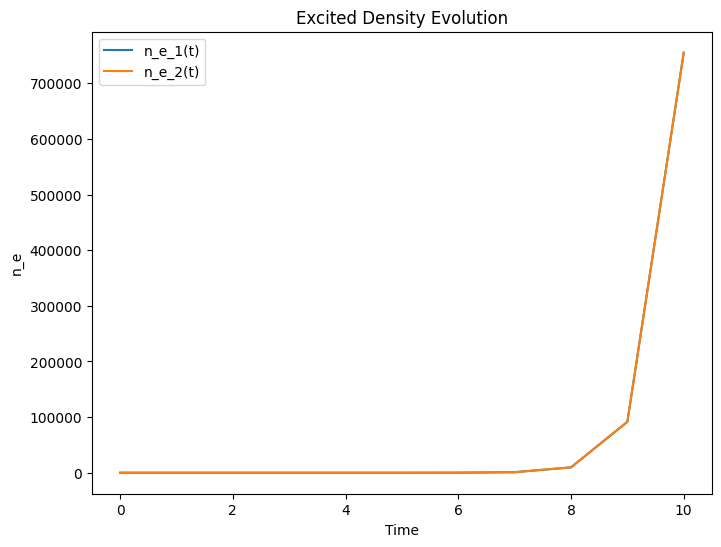

In [112]:
# QJMC simulation
# Define parameters
t = 0
dt = 0.1
total_time = 1.0
rho_atom_list = []   # density matrices
n_e_atom_1_list = []   # excitation density of 1st atom
n_e_atom_2_list = []   # excitation density of 2nd atom

# Simulation
while t < total_time:
    # record the current density matrix, and excitation density
    rho_atom_list.append(rho_atom.copy())
    n_e_atom_1_list.append(np.trace(rho_ee_atom_1 @ rho_atom)) 
    n_e_atom_2_list.append(np.trace(rho_ee_atom_2 @ rho_atom))
    
    # calculate delta_p11, delta_p12, delta_p21, delta_p22
    dp_11 = dt * gamma * np.trace(rho_atom @ sigma_plus_1 @ sigma_minus_1)
    dp_12 = dt * gamma * np.trace(rho_atom @ sigma_plus_1 @ sigma_minus_2)
    dp_21 = dt * gamma * np.trace(rho_atom @ sigma_plus_2 @ sigma_minus_1)
    dp_22 = dt * gamma * np.trace(rho_atom @ sigma_plus_2 @ sigma_minus_2)
    print(dp_11,dp_12,dp_21,dp_22)

    # Normalize delta_p11, delta_p12, delta_p21, delta_p22
    total_prob = dp_11 + dp_12 + dp_21 + dp_22
    dp_11 /= total_prob
    dp_12 /= total_prob
    dp_21 /= total_prob
    dp_22 /= total_prob
    print(dp_11,dp_12,dp_21,dp_22)
    
    # generate two random numbers between 0 and 1
    r1 = np.random.rand()
    r2 = np.random.rand()

    # propagate the state by the jump mechanism
    if r1 < dp:   # jump happens
        # pick one among four possiple jumps
        if r2 < dp_11: 
            rho_atom = dt/dp_11 * gamma * sigma_minus_1 @ rho_atom @ sigma_plus_1
        elif r2 < dp_11 + dp_12:
            rho_atom = dt/dp_12 * gamma * sigma_minus_2 @ rho_atom @ sigma_plus_1
        elif r2 < dp_11 + dp_12 + dp_21: 
            rho_atom = dt/dp_21 * gamma * sigma_minus_1 @ rho_atom @ sigma_plus_2
        else: 
            rho_atom = dt/dp_22 * gamma * sigma_minus_2 @ rho_atom @ sigma_plus_2
        
    else:
        rho_atom = (identity_atom - 1j * dt * H_atom) @ rho_atom @ (identity_atom + 1j * dt * H_atom_dagger)
        
    # update time
    t += dt

n_e_array_1 = np.array(n_e_atom_1_list)
n_e_array_2 = np.array(n_e_atom_2_list)

print("Final state rho(t) =")
print(rho_atom)

plt.figure(figsize=(8,6))
plt.plot(n_e_array_1, label = 'n_e_1(t)')
plt.plot(n_e_array_2, label = 'n_e_2(t)')

plt.title('Excited Density Evolution')
plt.xlabel('Time')
plt.ylabel('n_e')
plt.legend()
plt.show()